In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import incense
from incense import ExperimentLoader
from cycler import cycler


## Finding experiments

To use `incense` we first have to instantiate an experiment loader that will enable us to query the database for specific runs.

In [3]:
loader = ExperimentLoader(
    mongo_uri="mongodb://localhost:27017", 
    db_name='sacred'
)

In [65]:
query = {"$and": [
            {"config.autoencoder_type": "nomal_dim_tied_iteration"},
          
        {"$or": [{"_id": 51},  {"_id": 54},]}
        
        ]}
    
    
    
experiments=loader.find(query)
dtf=experiments.project(on=["config.targets_type","config.targets_type", "config.iteration", "config.autoencoder_type", "config.batch_size"])
names=[" ".join(str(x) for x in dtf[['autoencoder_type','batch_size','targets_type']].iloc[n-1].values) for n in range(len(experiments))]
dtf

,targets_type,iteration,autoencoder_type,batch_size
exp_id,,,,
51,Mnist,False,nomal_dim_tied_iteration,128
54,10_Targets,False,nomal_dim_tied_iteration,256


In [51]:
def print_imm(imgs,name):
    n = len(imgs[0]) # how many digits we will display
    if name:
        plt.figure(figsize=(2,0.5))
        plt.text(0.1, 0.1, name, fontsize=12) 
        plt.show()
    plt.figure(figsize=(2*len(imgs[0]), 2 * len(imgs) + 2))
    for i in range(n):
        for j in range(len(imgs)):
            # display original
            ax = plt.subplot(len(imgs), n, i + 1 + j * n)
            
            plt.imshow(imgs[j][i].reshape(28, 28))
            
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [9]:
def compare(data):
    evaluations_feature_classifier=[]
    predictions=[]
    pickle_artifact=[]
    autoencoder=[]

    for exp in experiments:
        #print(exp.id,exp.config)
        pickle_artifact = exp.artifacts[data].as_type(incense.artifact.PickleArtifact)
        predictions=pd.read_pickle(pickle_artifact.file,compression='gzip')
        
        evaluations_feature_classifier.append(predictions['evaluations_feature_classifier'])
        autoencoder.append(predictions['evaluations_autoencoder'])

        

    print(data)
    names=[]
    for exp in experiments:
        names.append(exp.id)
    
    plt.subplot(2, 3,2)
    plt.title("Accuracy over iterations evaluations_feature_classifier") 
    i=0
    for exp in evaluations_feature_classifier:
        plt.plot([item[1] for item in exp], label=names[i])
        i=i+1
        
    
      
    plt.subplot(2, 3,6)
    plt.title("mae iterations autoencoder") 
    i=0
    for exp in autoencoder:
        plt.plot([item[2] for item in exp], label=names[i])
        i=i+1
    plt.legend()
    
    plt.legend()
    
    

In [53]:
name_list=['predictions_df_0','predictions_df_10','predictions_df_20','predictions_df_30','predictions_df_40','predictions_df_50','predictions_df_60','predictions_df_70','predictions_df_80','predictions_df_90','predictions_df_100']
#name_list=['predictions_df_0','predictions_df_10','predictions_df_20']

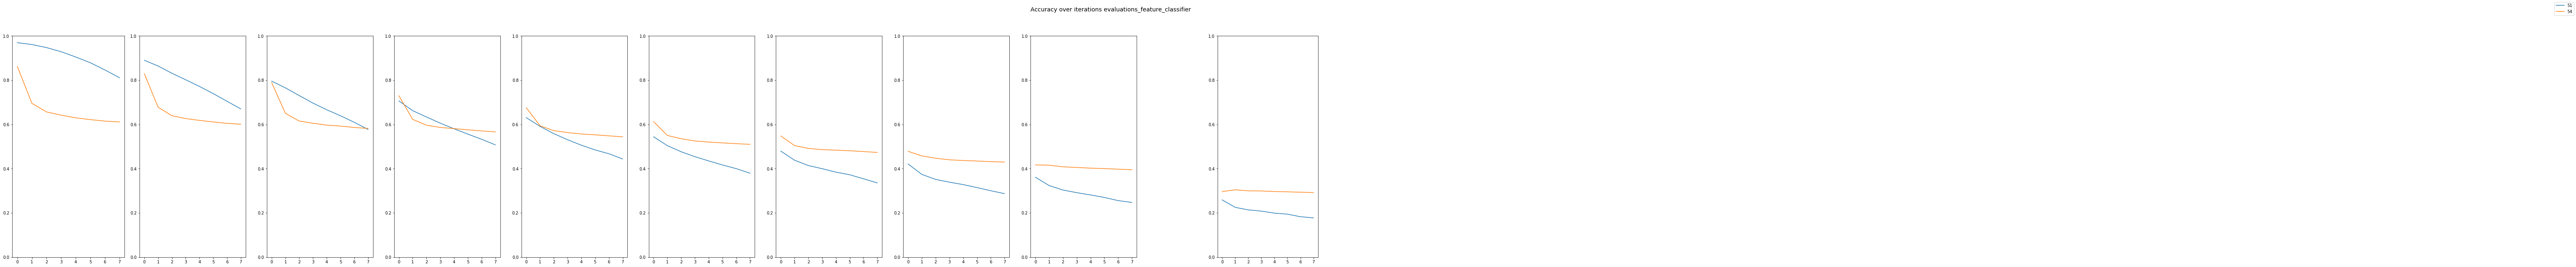

In [80]:
fig=plt.figure(figsize=(100,10))   
# Seee mae in cell above

fig.suptitle("Accuracy over iterations evaluations_feature_classifier")

#fig.subplots_adjust(top=0.85)
# Setting the values for all axes.


for index,data in enumerate(name_list,1):
    evaluations_feature_classifier=[]
    predictions=[]
    pickle_artifact=[]
    
    for exp in experiments:
        #print(exp.id,exp.config)
        pickle_artifact = exp.artifacts[data].as_type(incense.artifact.PickleArtifact)
        predictions=pd.read_pickle(pickle_artifact.file,compression='gzip')
        
        evaluations_feature_classifier.append(predictions['evaluations_feature_classifier'])
        
  
    
    ax=plt.subplot(1, len(data)+1,index)
    ax.set_ylim(0,1)

    i=0
    for exp in evaluations_feature_classifier:
        plt.plot([item[1] for item in exp], label=names[i])
        i=i+1
    #plt.legend()



# finally we invoke the legend (that you probably would like to customize...)

fig.legend(names)